<h2 style="text-align:center;">Welcome to the fifth laboratory work in this course</h2>
<h4 style="text-align:center;">This laboratory work is graded</h4>

<span style="color:#011f4b; font-size:15px"><b>The goal</b> of the laboratory work - is to start data preprocessing process 
<br/>
<b>Learning outcomes:</b>
* to be able to explore patterns in data
* to perform categorical values encoding
</span>
<br/><br/>
<span style="color:#011f4b;">
Your task is to complete this laboratory work within 80 minutes and submit the .ipynb file to DL "Laboratory05". 
<br/>
<b>Pay attention to the file name - your file should be named as "Laboratory_work_05_Yoursurname_YourName_yourgroup".</b> In case you didn't name your file properly (as showed before) <b>-5% penalty</b> will be applied.
</span>

<hr>

<span style="color:#011f4b">In many Machine-learning or Data Science activities, the data set might contain text or categorical values (basically non-numerical values). For example, color feature having values like red, orange, blue, white etc. Meal plan having values like breakfast, lunch, snacks, dinner, tea etc. Few algorithms such as CATBOAST, decision-trees can handle categorical values very well but most of the algorithms expect numerical values to achieve state-of-the-art results.

<span style="color:#011f4b; font-size:16px;"><b>Label Encoder</b></span>

<span style="color:#011f4b">This approach is very simple and it involves converting each value in a column to a number. Consider a dataset of bridges having a column names bridge-types having below values. Though there will be many more columns in the dataset, to understand label-encoding, we will focus on one categorical column only.
</span>

<span style="color:#011f4b"><b>Label Encoding in Python</b> can be achieved using <code>Sklearn Library</code>. Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.
<br/>
Example, </span>

<span style="color:#011f4b"> Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This ordering issue is addressed in another common alternative approach called <b>‘One-Hot Encoding’</b>. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column. Let’s consider the previous example of bridge type and safety levels with one-hot encoding.</span>

<b>First things first,</b> import <code><b>matplotlib</b></code>, <code><b>pandas</b></code> and <code><b>numpy</b></code>packages to your notebook. 
<br/> Simply uncomment the cell below:

<p style="text-align:right; color:#1460AA;">+2
    points </p>

In [18]:
# Run this cell - Запустите эту ячейку SHFT+Enter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [351]:
data = pd.read_csv("wine.csv")

<b>Inline</b> your matplotlib

In [352]:
%matplotlib inline

---

<b> Task 00 </b> Take the first look at your data

<p style="text-align:right; color:#1460AA;">+8
    points </p>

Think about the best way to discover your data at the first time. <br/> Read README file to understand the names of the columns

In [353]:
# Your code goes here
dataset = pd.read_csv("wine.csv", delimiter=';')
dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [354]:
# Your code goes here

In [355]:
# Your code goes here

---

<b> Task 01 </b> Hadling NaN values.

<p style="text-align:right; color:#1460AA;">+15
    points </p>

Calculate and visualize how many NaN valueas are there in your dataset. Calculate the percentage of NaNs. Choose the way you will handle NaNs - how are you going to restore them.

How many NaNs do you have. Answer as a text

In [356]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [357]:
def random_nans(data_):
    data = data_.copy()
    for i in range(np.random.randint(3840)):
        data.iloc[np.random.randint(4897),np.random.randint(5,10)] = np.NaN
    return data

In [358]:
wine_data_with_nans = random_nans(dataset)

In [359]:
wine_data_with_nans.info()
wine_data_with_nans.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4242 non-null   float64
 6   total sulfur dioxide  4277 non-null   float64
 7   density               4251 non-null   float64
 8   pH                    4264 non-null   float64
 9   sulphates             4273 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide     656
total sulfur dioxide    621
density                 647
pH                      634
sulphates               625
alcohol                   0
quality                   0
dtype: int64

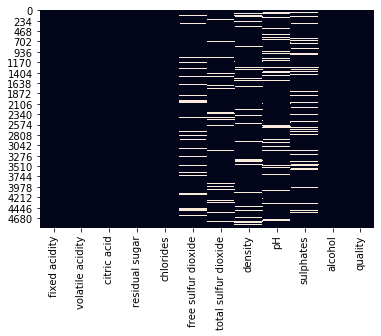

In [360]:
sns.heatmap(wine_data_with_nans.isnull(), cbar=False)

What are the persentage of NaNs. Answer as a text or output of a code snippet

In [226]:
(wine_data_with_nans.isnull().sum()/len(wine_data_with_nans))*100

fixed acidity           0.000000
volatile acidity        0.000000
citric acid             0.000000
residual sugar          0.000000
chlorides               0.000000
free sulfur dioxide     5.532871
total sulfur dioxide    5.022458
density                 4.920376
pH                      5.267456
sulphates               5.287873
alcohol                 0.000000
quality                 0.000000
dtype: float64

What NaNs are you going to restore - Answer as a text

I'm going to restore columns 'free sulfur dioxide', 'sulphates', 'total sulfur dioxide', 'pH'.
Because the percentage of missing data in this columns more than 5%

How will you restore NaNs (by filling with means? modes? medians? or another way) and why. Answer as a text

By filling with means because the average is closer to the real values, so it won't distort our data much

Restore the NaNs

In [231]:
# Your code goes here
wine_data_with_nans.rename(columns={'total sulfur dioxide':'TSD','free sulfur dioxide':'FSD'}, inplace=True)
wine_data_with_nans

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,FSD,TSD,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,NaN,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,NaN,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,NaN,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [235]:
wine_restored=wine_data_with_nans.copy()

In [256]:
wine_restored['FSD'] = wine_data_with_nans.fillna(wine_data_with_nans.FSD.mean())
wine_restored['TSD'] = wine_data_with_nans.fillna(wine_data_with_nans.TSD.mean())
wine_restored['sulphates'] = wine_data_with_nans.fillna(wine_data_with_nans.sulphates.mean())
wine_restored['pH'] = wine_data_with_nans.fillna(wine_data_with_nans.pH.mean())
wine_restored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixed acidity     4898 non-null   float64
 1   volatile acidity  4898 non-null   float64
 2   citric acid       4898 non-null   float64
 3   residual sugar    4898 non-null   float64
 4   chlorides         4898 non-null   float64
 5   FSD               4898 non-null   float64
 6   TSD               4898 non-null   float64
 7   density           4657 non-null   float64
 8   pH                4898 non-null   float64
 9   sulphates         4898 non-null   float64
 10  alcohol           4898 non-null   float64
 11  quality           4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [257]:
wine_dropped = wine_restored.dropna()
wine_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4657 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixed acidity     4657 non-null   float64
 1   volatile acidity  4657 non-null   float64
 2   citric acid       4657 non-null   float64
 3   residual sugar    4657 non-null   float64
 4   chlorides         4657 non-null   float64
 5   FSD               4657 non-null   float64
 6   TSD               4657 non-null   float64
 7   density           4657 non-null   float64
 8   pH                4657 non-null   float64
 9   sulphates         4657 non-null   float64
 10  alcohol           4657 non-null   float64
 11  quality           4657 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 473.0 KB


---

<b> Task 02 </b> Cleaning data - dropping unrelevant data and outliers

<p style="text-align:right; color:#1460AA;">+15
    points </p>

What features are unrelevant? Why? Answer as a text

In [ ]:
There is no unrelevant columns. Each column is important.

Dropping unrelevant data

In [244]:
# Your code goes here

Detecting outliers

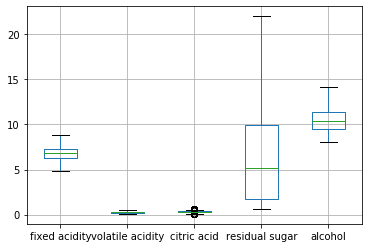

In [287]:
# Your code goes here
num_col1=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'alcohol']
wine_dropped.boxplot(num_col1)

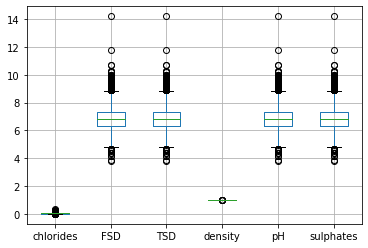

In [263]:
# Your code goes here
num_col2=['chlorides', 'FSD', 'TSD', 'density', 'pH', 'sulphates']
wine_dropped.boxplot(num_col2)

Dropping outliers

In [345]:
# Your code goes here
for x in num_col1:
    q75,q25 = np.percentile(wine_dropped.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    wine_dropped.loc[wine_dropped[x] < min,x] = np.nan
    wine_dropped.loc[wine_dropped[x] > max,x] = np.nan

C:\Users\troum\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\troum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\troum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from 

In [346]:
for x in num_col2:
    q75,q25 = np.percentile(wine_dropped.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    wine_dropped.loc[wine_dropped[x] < min,x] = np.nan
    wine_dropped.loc[wine_dropped[x] > max,x] = np.nan

C:\Users\troum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\troum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [347]:
wine_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4657 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixed acidity     4544 non-null   float64
 1   volatile acidity  4479 non-null   float64
 2   citric acid       4396 non-null   float64
 3   residual sugar    4650 non-null   float64
 4   chlorides         4451 non-null   float64
 5   FSD               4544 non-null   float64
 6   TSD               4544 non-null   float64
 7   density           4652 non-null   float64
 8   pH                4544 non-null   float64
 9   sulphates         4544 non-null   float64
 10  alcohol           4657 non-null   float64
 11  quality           4468 non-null   float64
dtypes: float64(12)
memory usage: 473.0 KB


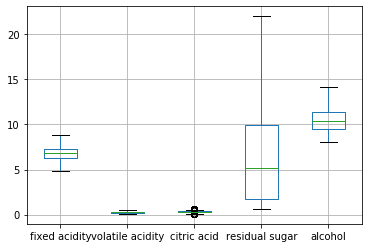

In [348]:
# Your code goes here
wine_dropped.boxplot(num_col1)

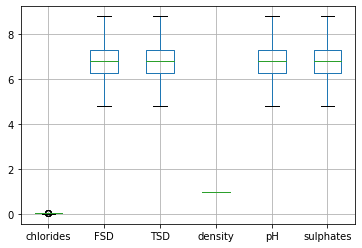

In [349]:
wine_dropped.boxplot(num_col2)

In [350]:
wine_dropped_outl=wine_dropped.dropna()
wine_dropped_outl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3844 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixed acidity     3844 non-null   float64
 1   volatile acidity  3844 non-null   float64
 2   citric acid       3844 non-null   float64
 3   residual sugar    3844 non-null   float64
 4   chlorides         3844 non-null   float64
 5   FSD               3844 non-null   float64
 6   TSD               3844 non-null   float64
 7   density           3844 non-null   float64
 8   pH                3844 non-null   float64
 9   sulphates         3844 non-null   float64
 10  alcohol           3844 non-null   float64
 11  quality           3844 non-null   float64
dtypes: float64(12)
memory usage: 390.4 KB


---

<b> Task 03 </b> Data types

<p style="text-align:right; color:#1460AA;">+5
    points </p>

Identify what are your categorical data and numerical data. Answer as a text or as an output of code snippet

Categorical data - 'quality'

Numerical - <br/>fixed acidity
            <br/>volatile acidity
            <br/>citric acid
            <br/>residual sugar
            <br/>chlorides
            <br/>free sulfur dioxide
            <br/>total sulfur dioxide
            <br/>density
            <br/>pH
            <br/>sulphates
            <br/>alcohol

---

<b>Task 04</b> Data Visualization 

Use different ways to visualize your categorical and numerical data 

<p style="text-align:right; color:#1460AA;">+20
    points </p>

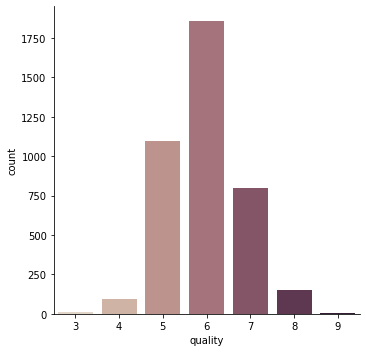

In [271]:
# Your code goes here
sns.catplot(x='quality', kind="count", palette="ch:.25", data=wine_dropped_outl)

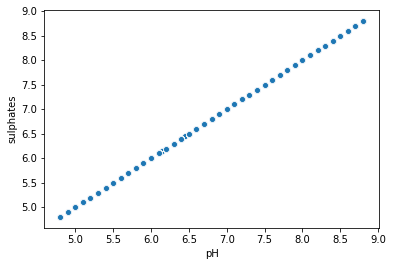

In [286]:
# Your code goes here
sns.scatterplot(data=wine_dropped_outl, x="pH", y="sulphates")

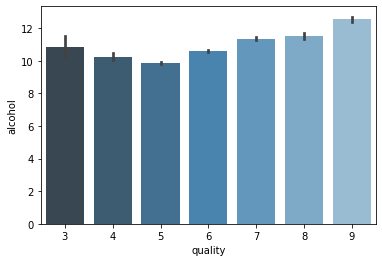

In [300]:
# Your code goes here
sns.barplot(x="quality", y="alcohol", data=wine_dropped_outl,
                 palette="Blues_d")

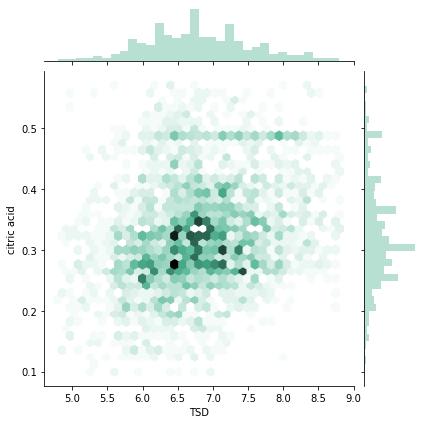

In [307]:
# Your code goes here
x = wine_dropped_outl.TSD
y = wine_dropped_outl['citric acid']

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")

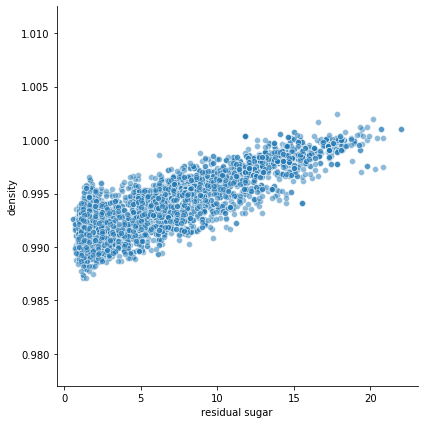

In [310]:
# Your code goes here
sns.relplot(x="residual sugar", y="density",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=wine_dropped_outl)

---

<b> Task 05 </b> Relationships in your data

More advanced statistical analysis aims to identify patterns in data, for example, whether there is a link between two variables, or whether certain groups are more likely to show certain attributes.
<br/> <br/> We often collect data so that we can find patterns in the data, like numbers trending upwards or correlations between two sets of numbers.
Depending on the data and the patterns, sometimes we can see that pattern in a simple tabular presentation of the data. 
<br/><br/>Other times, it helps to visualize the data in a chart, like a time series, line graph, or scatter plot - you can use your visualization from Task 04.
<br/><br/>You also use correlation coefficient here, check [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) tutorial or [this](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) one, or [this](https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec) one

<p style="text-align:right; color:#1460AA;">+20
    points </p>

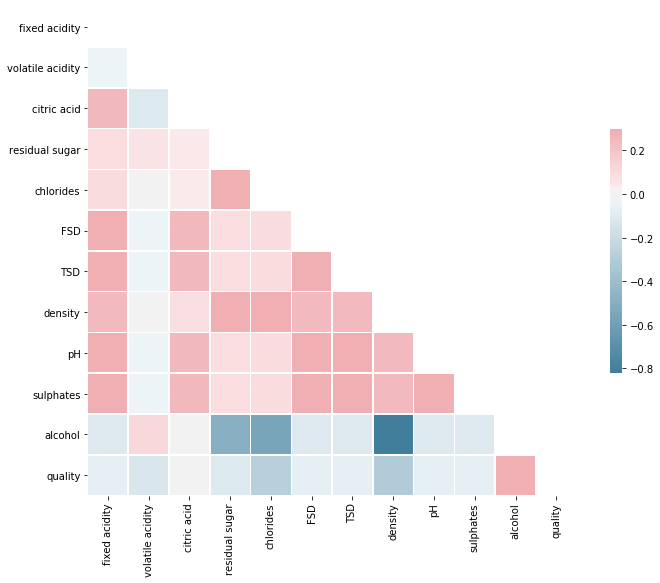

In [327]:
corr = wine_dropped_outl.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [330]:
# Your code goes here
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

In [331]:
wine_dropped_outl.corr(method=histogram_intersection)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,FSD,TSD,density,pH,sulphates,alcohol,quality
fixed acidity,1.0,1053.2,1299.7,17941.1,169.9,27255.0,27255.0,3981.5,27255.0,27255.0,27255.0,23196.8
volatile acidity,1053.2,1.0,954.2,1053.2,169.9,1053.2,1053.2,1053.2,1053.2,1053.2,1053.2,1053.2
citric acid,1299.7,954.2,1.0,1299.7,169.9,1299.7,1299.7,1299.7,1299.7,1299.7,1299.7,1299.7
residual sugar,17941.1,1053.2,1299.7,1.0,169.9,17941.1,17941.1,3973.5,17941.1,17941.1,21477.0,16048.7
chlorides,169.9,169.9,169.9,169.9,1.0,169.9,169.9,169.9,169.9,169.9,169.9,169.9
FSD,27255.0,1053.2,1299.7,17941.1,169.9,1.0,27255.0,3981.5,27255.0,27255.0,27255.0,23196.8
TSD,27255.0,1053.2,1299.7,17941.1,169.9,27255.0,1.0,3981.5,27255.0,27255.0,27255.0,23196.8
density,3981.5,1053.2,1299.7,3973.5,169.9,3981.5,3981.5,1.0,3981.5,3981.5,3981.5,3981.5
pH,27255.0,1053.2,1299.7,17941.1,169.9,27255.0,27255.0,3981.5,1.0,27255.0,27255.0,23196.8
sulphates,27255.0,1053.2,1299.7,17941.1,169.9,27255.0,27255.0,3981.5,27255.0,1.0,27255.0,23196.8


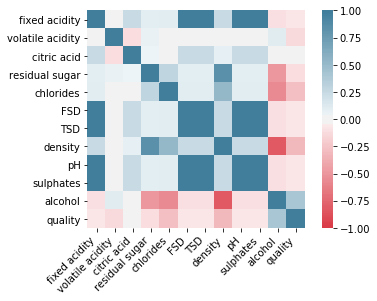

In [344]:
# Your code goes here
corr = wine_dropped_outl.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 230, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

---

<b>Task 06 </b> Categorical Data encoding (This task can be done later, until the next class)

<p style="text-align:right; color:#1460AA;">+15
    points </p>

Encode your categorical data

Use this [help](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd) to perform Label Encoding and One-Hot Encoding on your categorical data

---

<b><span style="font-size:20px; color:orange">G</span>reat!</b> You did awesome job! <br/> <br/> But don't stop practicing, remember - since you will be working with data, you have to understand its nature.
<br/> <br/> <b>Now</b> go to the Quiz 05
<br/> 

---